# Natural Nets and Deep Learning

## TF Syntax Basics - Part One - Preparing the Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
path='C:\\Users\\HP\\Desktop\\Python\\DS_ML_Bootcamp\\TensorFlow_FILES'

In [7]:
df=pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


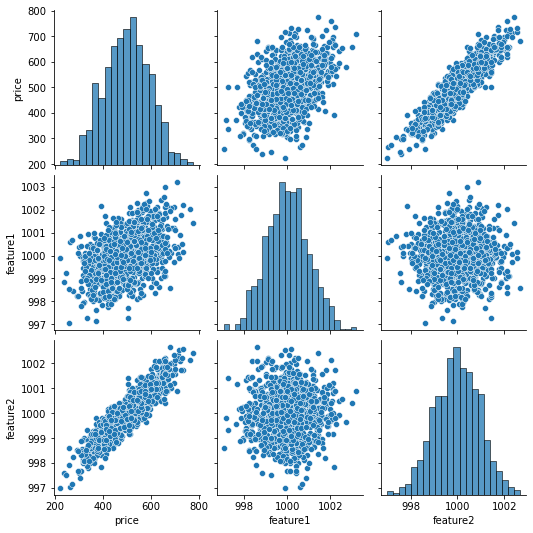

In [8]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split

In [53]:
# we need numpy array -> values

X=df[['feature1', 'feature2']].values
y=df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train

array([[ 998.48889502, 1000.12658144],
       [ 999.21210104,  999.55094486],
       [ 999.82345446, 1000.64314664],
       ...,
       [ 999.98167664,  997.68290688],
       [1000.25556216,  999.90515693],
       [1000.2413667 ,  998.49108442]])

In [54]:
# normalize and scale feature data

from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

X_train

array([[0.22179862, 0.55212838],
       [0.34106018, 0.45061693],
       [0.44187649, 0.6432228 ],
       ...,
       [0.4679684 , 0.12119512],
       [0.51313398, 0.51308096],
       [0.51079305, 0.26371433]])

In [56]:
print(X_train.min(), X_train.max())

0.0 1.0


## TF Syntax Basics - Part Two - Creating and Training the Model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [59]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

In [74]:
# 2 ways to create Keras Sequential Model

# 1 way
model1=Sequential([Dense(4, activation='relu'),
                 Dense(4, activation='relu'),
                  Dense(4, activation='relu'),
                 Dense(1)])


# 2 way - preffered in that course
model=Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))                    

In [75]:
'''
Choosing an optimizer and loss
Keep in mind what kind of problem you are trying to solve:

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')
'''


model.compile(optimizer='rmsprop', loss='mse')

In [76]:
'''
Training
Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

Sample: one element of a dataset.
Example: one image is a sample in a convolutional network
Example: one audio file is a sample for a speech recognition model
Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).'''

model.fit(X_train, y_train, epochs=250, verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 258005.5944
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 262430.3567
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 259152.5510
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 258434.3696
Epoch 5/250
22/22 [==============================] - 0s 997us/step - loss: 254380.6087
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255782.1433
Epoch 7/250
22/22 [==============================] - 0s 997us/step - loss: 258679.2337
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254904.7351
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 251788.0516
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 257378.0292
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253163.7677
Epoch 12/250
22/22 [==============================] - 0s 1m

22/22 [==============================] - 0s 1ms/step - loss: 24.0643
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 23.4617
Epoch 196/250
22/22 [==============================] - 0s 902us/step - loss: 23.1723
Epoch 197/250
22/22 [==============================] - 0s 902us/step - loss: 23.9780
Epoch 198/250
22/22 [==============================] - 0s 950us/step - loss: 26.1258
Epoch 199/250
22/22 [==============================] - 0s 855us/step - loss: 27.0393
Epoch 200/250
22/22 [==============================] - 0s 997us/step - loss: 24.8155
Epoch 201/250
22/22 [==============================] - 0s 997us/step - loss: 25.4535
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 23.6789
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 22.4039
Epoch 204/250
22/22 [==============================] - 0s 997us/step - loss: 23.7167
Epoch 205/250
22/22 [==============================] - 0s 997us/step - loss: 25.1932
Ep

<AxesSubplot:>

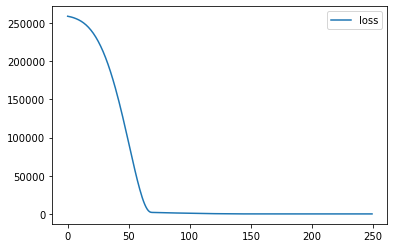

In [77]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

## TF Syntax Basics - Part Three - Model Evaluation

In [78]:
model.evaluate(X_test, y_test, verbose=0)

29.665605545043945

In [79]:
model.evaluate(X_train, y_train, verbose=0)

25.016708374023438

In [91]:
test_predictions=model.predict(X_test)

In [92]:
test_predictions

array([[656.8613 ],
       [514.2179 ],
       [520.5068 ],
       [487.06985],
       [543.72034],
       [557.9324 ],
       [604.4564 ],
       [632.41736],
       [602.83496],
       [558.0161 ],
       [418.24326],
       [475.8236 ],
       [449.2489 ],
       [484.57303],
       [492.126  ],
       [567.45654],
       [366.44318],
       [503.68527],
       [580.4912 ],
       [532.23505],
       [474.58725],
       [345.76718],
       [486.29132],
       [531.60535],
       [588.0207 ],
       [547.83545],
       [366.75003],
       [554.5444 ],
       [647.4536 ],
       [510.13785],
       [566.63763],
       [487.7065 ],
       [558.0559 ],
       [703.3617 ],
       [382.44388],
       [435.4266 ],
       [463.12186],
       [432.9597 ],
       [383.24423],
       [560.7406 ],
       [329.98032],
       [618.55695],
       [617.1367 ],
       [527.05096],
       [578.4092 ],
       [486.78342],
       [457.43576],
       [412.07736],
       [520.8398 ],
       [630.324  ],


In [93]:
test_predictions=pd.Series(test_predictions.reshape(300,))

pred_df=pd.DataFrame(y_test, columns=['Test True Y'])
pred_df['predictions']=test_predictions

pred_df

,Test True Y,predictions
0,655.391403,656.861328
1,511.366708,514.217896
2,515.778446,520.506775
3,478.358238,487.069855
4,543.830279,543.720337
...,...,...
295,372.777436,371.146759
296,639.818362,640.126465
297,403.062564,396.770721
298,579.428431,586.448303


<AxesSubplot:xlabel='Test True Y', ylabel='predictions'>

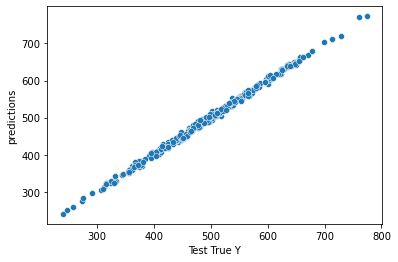

In [94]:
sns.scatterplot(x='Test True Y', y='predictions', data=pred_df)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [96]:
mean_absolute_error(pred_df['Test True Y'], pred_df['predictions'])

4.32480961972583

In [97]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [98]:
# 4.23 dollars off mean 498,67 $

In [99]:
mean_squared_error(pred_df['Test True Y'], pred_df['predictions'])

29.66559083790996

In [100]:
new_gem=[[998, 1000]]

new_gem=scaler.transform(new_gem)
model.predict(new_gem)

array([[421.04175]], dtype=float32)

In [101]:
from tensorflow.keras.models import load_model

In [102]:
model.save('my_gem_model.h5')

In [103]:
later_model=load_model('my_gem_model.h5')

In [104]:
later_model.predict(new_gem)

array([[421.04175]], dtype=float32)

## TF Regression Code Along - Exploratory Data Analysis

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
df=pd.read_csv('TensorFlow_FILES\DATA\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [108]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [109]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='price', ylabel='Count'>

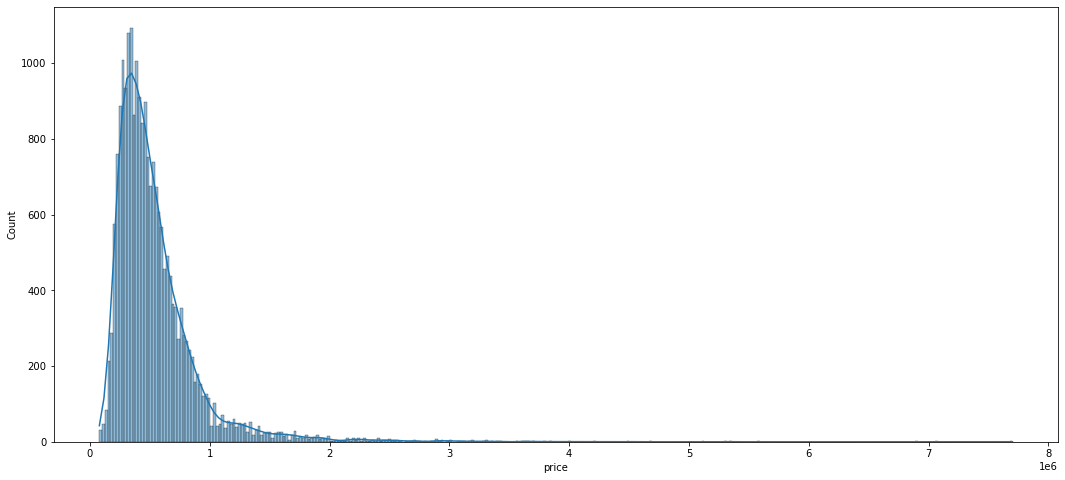

In [116]:
plt.figure(figsize=(18,8))
sns.histplot(df['price'], kde=True)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

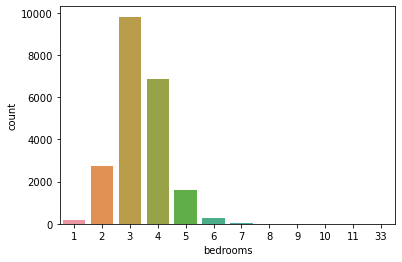

In [118]:
sns.countplot(data=df,x='bedrooms')

In [119]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [120]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [122]:
df.corr()['price'].sort_valuess()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

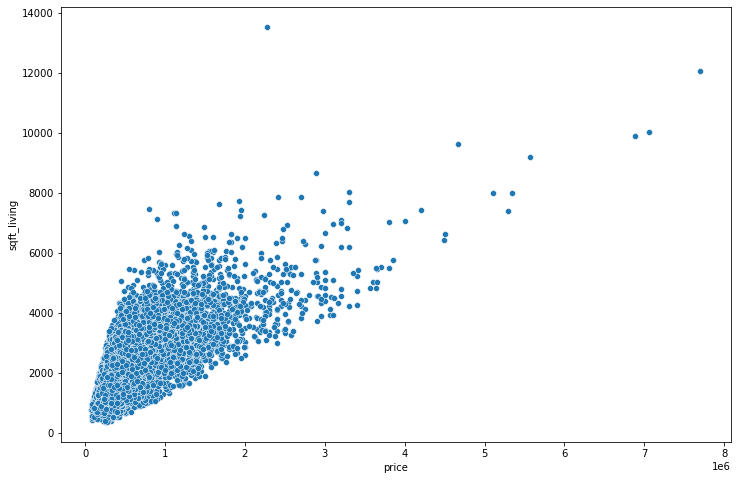

In [126]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='sqft_living', data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

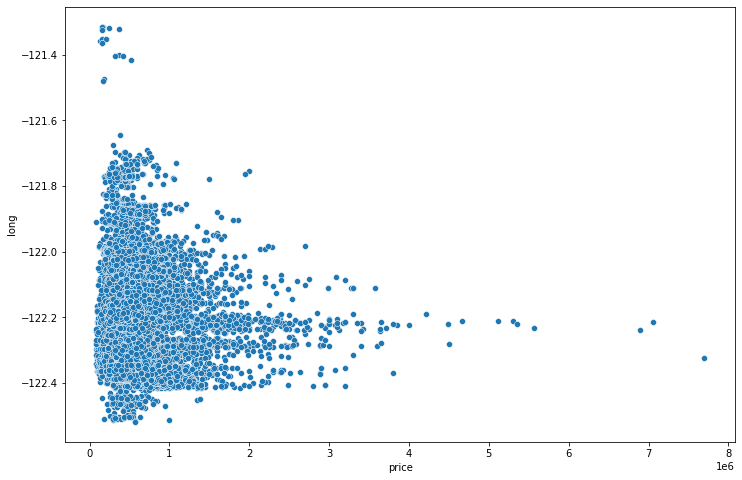

In [135]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

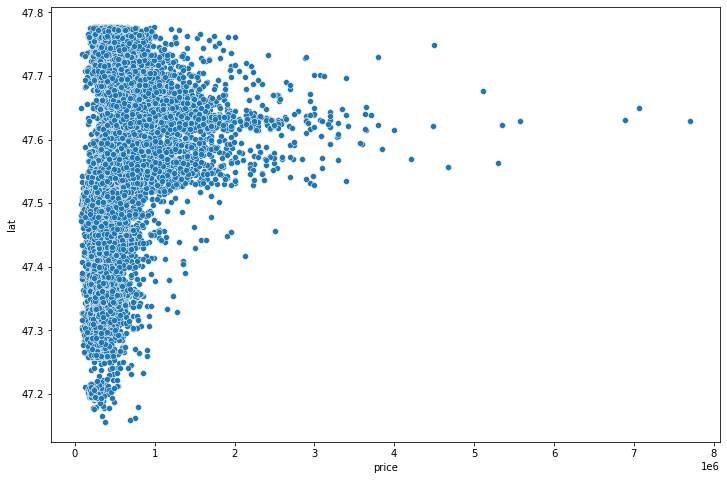

In [132]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

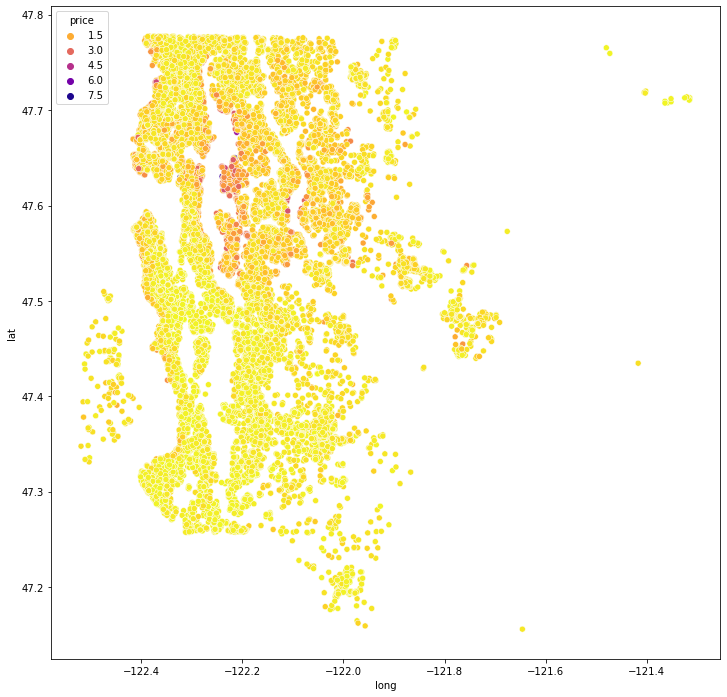

In [140]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='plasma_r')

In [142]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [143]:
len(df)

21597

In [144]:
len(df)*0.01

215.97

In [145]:
#remove 1%
non_top_1_perc=df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

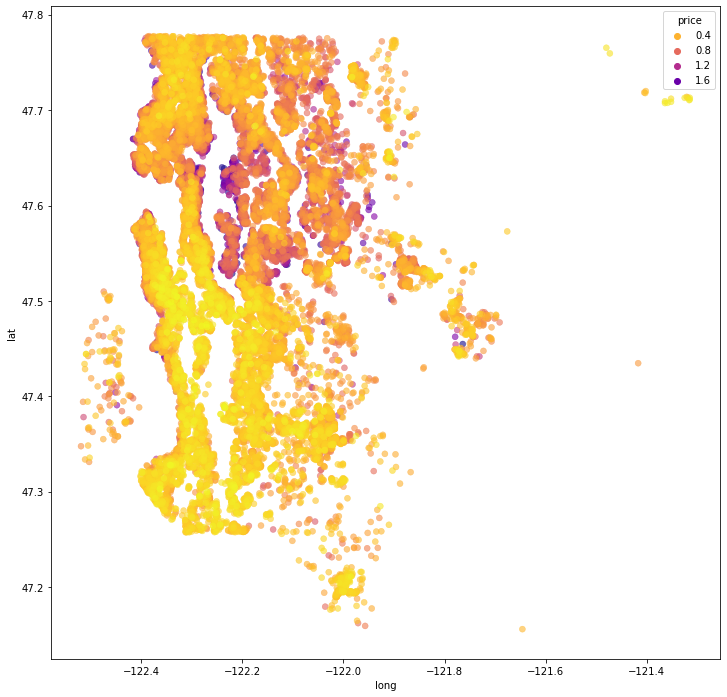

In [149]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', palette='plasma_r', edgecolor=None, alpha=0.6)

<AxesSubplot:xlabel='long', ylabel='lat'>

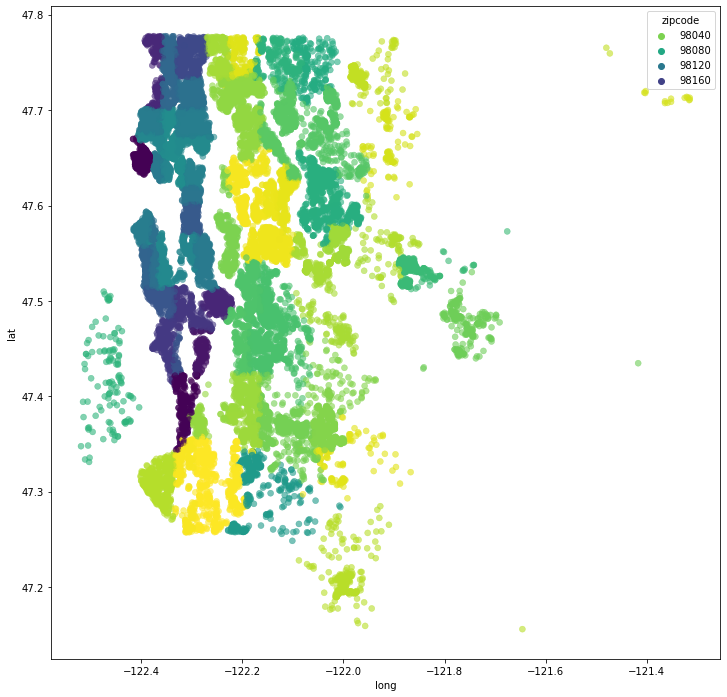

In [168]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='zipcode', palette='viridis_r', edgecolor=None, alpha=0.6)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

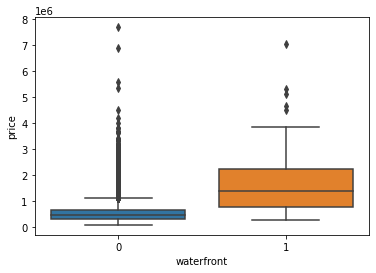

In [150]:
sns.boxplot(x='waterfront',y='price', data=df )

## TF Regression Code Along - Exploratory Data Analysis - Continued

In [151]:
df=df.drop('id', axis=1)

In [153]:
df['date']=pd.to_datetime(df['date'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [154]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

In [155]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


<AxesSubplot:xlabel='month', ylabel='price'>

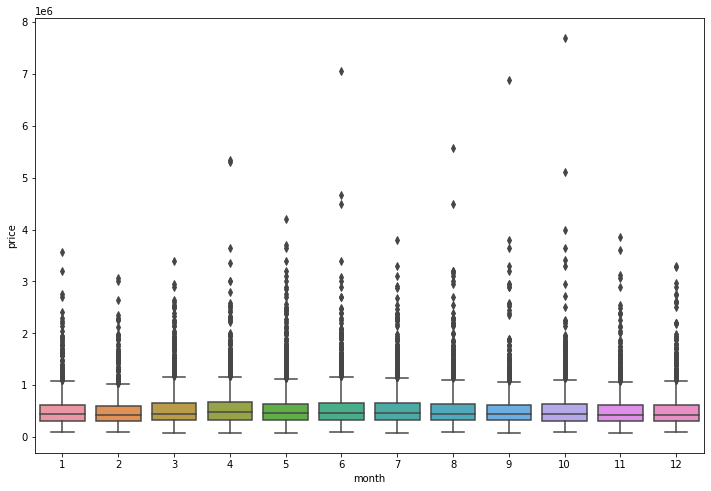

In [157]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

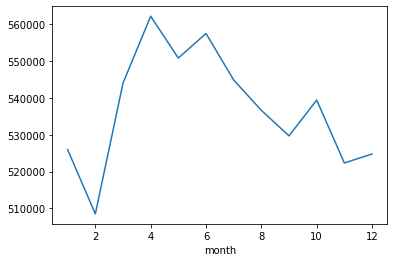

In [159]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

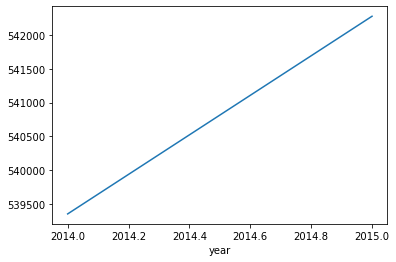

In [160]:
df.groupby('year').mean()['price'].plot()

In [161]:
df=df.drop('date', axis=1)

In [163]:
df=df.drop('zipcode', axis=1)

In [169]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [170]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## TF Regression Code Along - Data Preprocessing and Creating a Model

In [171]:
from sklearn.model_selection import train_test_split

In [194]:
X=df.drop('price', axis=1)
y=df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [198]:
X_train.shape

(15117, 19)

In [199]:
model=Sequential()

model.add(Dense(19, activation='relu'))
# copy several times
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [200]:
# batch_size - smaller - longer train

model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         batch_size=128,
         epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 452554683187.2000 - val_loss: 418879930368.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 419409884228.2667 - val_loss: 413849485312.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 416303339383.4667 - val_loss: 371207634944.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 346718911283.2000 - val_loss: 238271381504.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 191318956168.5333 - val_loss: 111801671680.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 95104855313.0667 - val_loss: 95724404736.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 92130004343.4667 - val_loss: 93830152192.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96063905655.4667 - val_loss: 92482609152.0000
Epoch 9/400
119/119 [=

Epoch 68/400
119/119 [==============================] - 0s 2ms/step - loss: 38063720362.6667 - val_loss: 42732552192.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 39665212876.8000 - val_loss: 41592532992.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37128432537.6000 - val_loss: 40594292736.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36680997905.0667 - val_loss: 40146120704.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 35813520085.3333 - val_loss: 40660754432.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37909459916.8000 - val_loss: 40899293184.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 35632436582.4000 - val_loss: 39117996032.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 34897527534.9333 - val_loss: 39844974592.0000
Epoch 76/400
119/119 [==

119/119 [==============================] - 0s 1ms/step - loss: 30197843148.8000 - val_loss: 33311408128.0000
Epoch 201/400
119/119 [==============================] - 0s 1ms/step - loss: 32485229107.2000 - val_loss: 34105309184.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31474028526.9333 - val_loss: 32816334848.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 30828559394.1333 - val_loss: 33735579648.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 29179530359.4667 - val_loss: 34355388416.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31797790088.5333 - val_loss: 33962153984.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31612274022.4000 - val_loss: 33465227264.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 30724962611.2000 - val_loss: 32702167040.0000
Epoch 208/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28666393429.3333 - val_loss: 35042897920.0000
Epoch 333/400
119/119 [==============================] - 0s 2ms/step - loss: 31402786235.7333 - val_loss: 34045349888.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 28048523255.4667 - val_loss: 33072943104.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29738326152.5333 - val_loss: 34215483392.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30700437504.0000 - val_loss: 33364219904.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 30115140966.4000 - val_loss: 34620219392.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29764322133.3333 - val_loss: 33460295680.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 29756515515.7333 - val_loss: 32620267520.0000
Epoch 340/400
119/119 [=======

## TF Regression Code Along - Model Evaluation and Predictions

<AxesSubplot:>

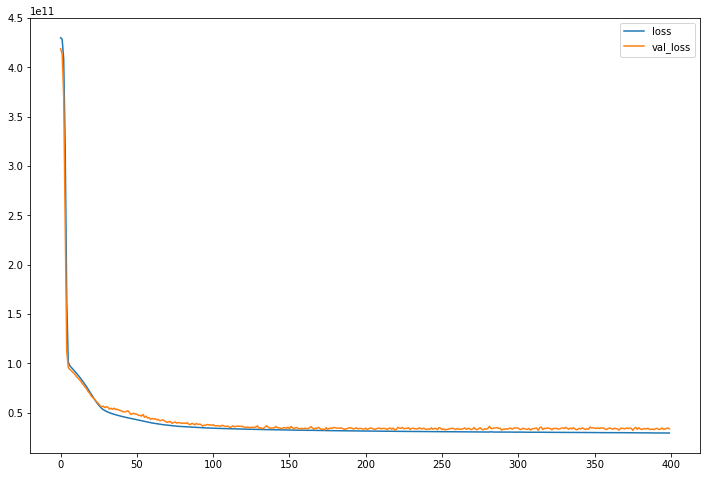

In [202]:
losses=pd.DataFrame(model.history.history)
losses.plot(figsize=(12,8))

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [205]:
predictions=model.predict(X_test)

mean_absolute_error(y_test, predictions)

110518.74287229938

In [208]:
np.sqrt(mean_absolute_error(y_test, predictions))

332.44359351971184

In [206]:
mean_squared_error(y_test, predictions)

33509499068.862328

In [210]:
df['price'].mean()

540296.5735055795

In [211]:
# mean: 540296.5735055795
# error: 110518.74287229938
# about 20% !!!

In [212]:
explained_variance_score(y_test, predictions)

0.7837225198224652

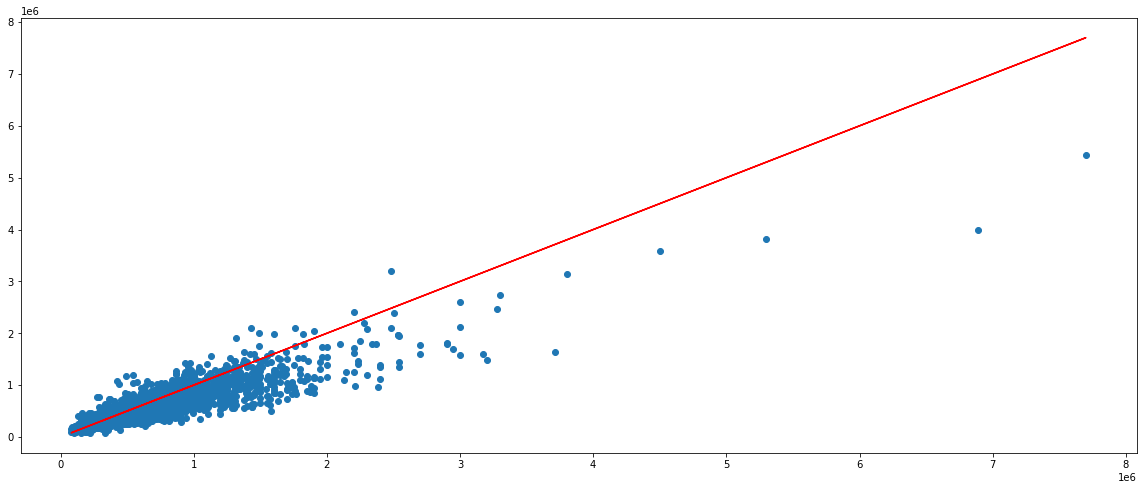

In [217]:
plt.figure(figsize=(20,8))
plt.scatter(y_test, predictions)

plt.plot(y_test, y_test, 'r')

In [219]:
single_house=df.drop('price', axis=1).iloc[1]
single_house

bedrooms            3.000
bathrooms           2.250
sqft_living      2570.000
sqft_lot         7242.000
floors              2.000
waterfront          0.000
view                0.000
condition           3.000
grade               7.000
sqft_above       2170.000
sqft_basement     400.000
yr_built         1951.000
yr_renovated     1991.000
lat                47.721
long             -122.319
sqft_living15    1690.000
sqft_lot15       7639.000
year             2014.000
month              12.000
Name: 1, dtype: float64

In [221]:
single_house=scaler.transform(single_house.values.reshape(-1, 19))

In [222]:
model.predict(single_house)

array([[495179.28]], dtype=float32)

In [225]:
df.iloc[1]

price            538000.000
bedrooms              3.000
bathrooms             2.250
sqft_living        2570.000
sqft_lot           7242.000
floors                2.000
waterfront            0.000
view                  0.000
condition             3.000
grade                 7.000
sqft_above         2170.000
sqft_basement       400.000
yr_built           1951.000
yr_renovated       1991.000
lat                  47.721
long               -122.319
sqft_living15      1690.000
sqft_lot15         7639.000
year               2014.000
month                12.000
Name: 1, dtype: float64

## TF Classification Code Along - EDA and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('TensorFlow_FILES\DATA\cancer_classification.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

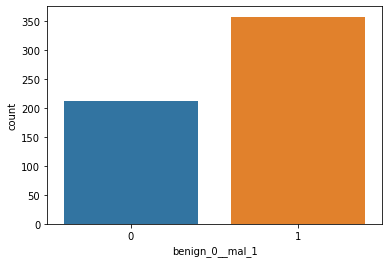

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

In [6]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

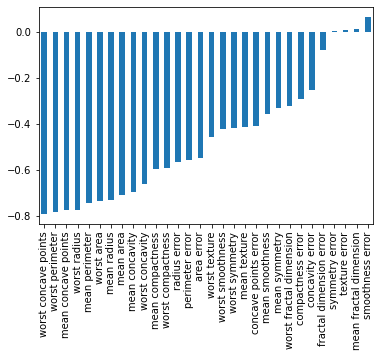

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

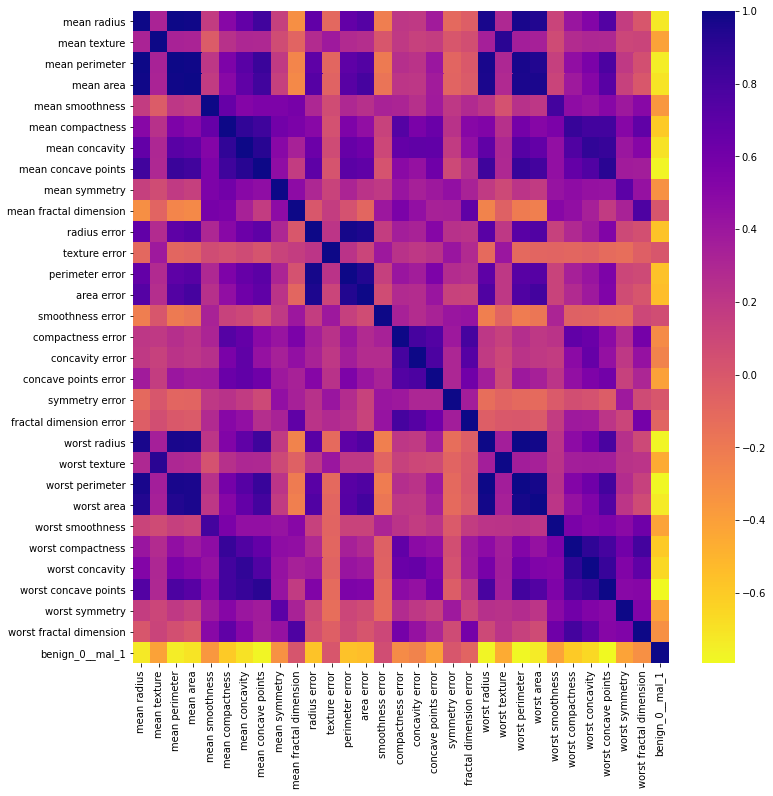

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='plasma_r')

In [17]:
from sklearn.model_selection import train_test_split

X=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## TF Classification - Dealing with Overfitting and Evaluation

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
X_train.shape

(426, 30)

In [24]:
model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6762 - val_loss: 0.6480
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6379 - val_loss: 0.6119
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6014 - val_loss: 0.5709
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5479 - val_loss: 0.5057
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4897 - val_loss: 0.4511
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4332 - val_loss: 0.4028
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3884 - val_loss: 0.3601
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3460 - val_loss: 0.3234
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3261 - val_loss: 0.2932
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3007 - val_loss: 0.2687
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0604 - val_loss: 0.0969
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0491 - val_loss: 0.0954
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.1051
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0442 - val_loss: 0.0947
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0489 - val_loss: 0.0993
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0492 - val_loss: 0.1084
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0574 - val_loss: 0.0955
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0490 - val_loss: 0.1034
Epoch 91/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0416 - val_loss: 0.0970
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0551 - val_loss: 0.0955
Epoch 93/600

14/14 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.1016
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0413 - val_loss: 0.0964
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0265 - val_loss: 0.1252
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0305 - val_loss: 0.0889
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0338 - val_loss: 0.1129
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.0989
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.1139
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0322 - val_loss: 0.0990
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0364 - val_loss: 0.0982
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0307 - val_loss: 0.1061
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0295 - val_loss: 0.1038
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.1225
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.0970
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.1055
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.0908
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.1122
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0264 - val_loss: 0.1022
Epoch 333/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0214 - val_loss: 0.1120
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0193 - val_loss: 0.1056
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0301 - val_loss: 0.1423
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.1098
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.1158
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.1108
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.1383
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0144 - val_loss: 0.1070
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.1193
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.1172
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0144 - val_loss: 0.1090
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.1344
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.1042
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.1644
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.1771
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0151 - val_loss: 0.1513
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.1630
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.1550
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.1652
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.1617
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.1708
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.1655
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.1612
Epoc

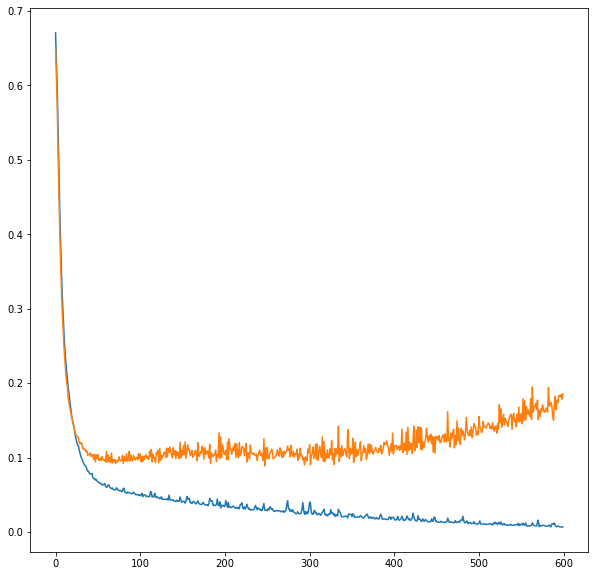

In [26]:
losses=pd.DataFrame(model.history.history)

plt.figure(figsize=(10,10))
plt.plot(losses)

In [27]:
# Second model with calbacks

from tensorflow.keras.callbacks import EarlyStopping

In [28]:
help(EarlyStopping)

'''
 patience: Number of epochs with no improvement
 |        after which training will be stopped.
 '''

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [31]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), 
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7073 - val_loss: 0.6813
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6701 - val_loss: 0.6454
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6290 - val_loss: 0.5968
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5825 - val_loss: 0.5535
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5273 - val_loss: 0.5044
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4898 - val_loss: 0.4491
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4468 - val_loss: 0.3936
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3690 - val_loss: 0.3404
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3290 - val_loss: 0.2968
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2860 - val_loss: 0.2673
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0565 - val_loss: 0.1110
Epoch 00083: early stopping


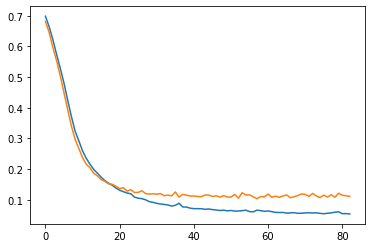

In [34]:
losses=pd.DataFrame(model.history.history)

plt.plot(losses)

In [35]:
from tensorflow.keras.layers import Dropout

In [38]:
# dropout layers

early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')



model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), 
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6993 - val_loss: 0.6813
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6767 - val_loss: 0.6602
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6666 - val_loss: 0.6412
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6205
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6187 - val_loss: 0.5978
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5983 - val_loss: 0.5706
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.5436
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5602 - val_loss: 0.5104
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5181 - val_loss: 0.4782
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4899 - val_loss: 0.4474
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1342 - val_loss: 0.1074
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1021 - val_loss: 0.1134
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1042 - val_loss: 0.1169
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1095 - val_loss: 0.1091
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1222 - val_loss: 0.1246
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1117 - val_loss: 0.1056
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1076 - val_loss: 0.1130
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1098 - val_loss: 0.1243
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1449 - val_loss: 0.1059
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0999 - val_loss: 0.1103
Epoch 93/600


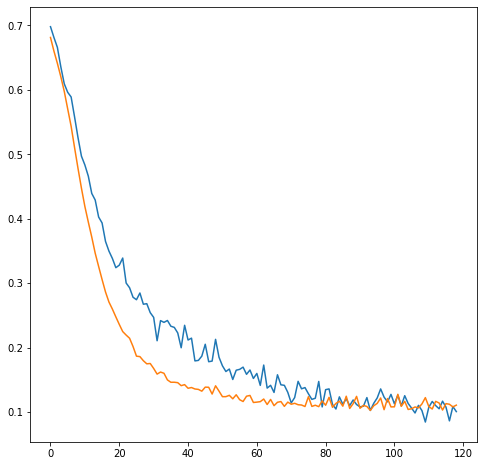

In [45]:
losses=pd.DataFrame(model.history.history)

plt.figure(figsize=(8,8))
plt.plot(losses)

In [56]:
predictions=model.predict(X_test)
predictions=np.where(predictions>0.5,1,0)
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]


## Tensorboard

In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# creating a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [61]:
pwd

'C:\\Users\\HP\\Desktop\\Python\\DS_ML_Bootcamp'

In [62]:
from datetime import datetime
datetime.now().strftime("%Y-%m-%d--%H%M")

'2021-02-17--2050'

In [63]:
# WINDOWS: Use "logs\\fit"
# MACOS/LINUX: Use "logs\fit"

log_directory = 'logs\\fit'

# OPTIONAL: ADD A TIMESTAMP FOR UNIQUE FOLDER
# timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
# log_directory = log_directory + '\\' + timestamp


board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [64]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [65]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop,board]
          )

Epoch 1/600
14/14 [==============================] - 9s 280ms/step - loss: 0.7295 - val_loss: 0.6756
Epoch 2/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6983 - val_loss: 0.6590
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6690 - val_loss: 0.6396
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6419 - val_loss: 0.6205
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6285 - val_loss: 0.5962
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6301 - val_loss: 0.5602
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5758 - val_loss: 0.5308
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5826 - val_loss: 0.5025
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5583 - val_loss: 0.4707
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5379 - val_loss: 0.4349
Epoc

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0923 - val_loss: 0.0945
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1118 - val_loss: 0.0982
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1223 - val_loss: 0.0912
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1167 - val_loss: 0.0895
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0975 - val_loss: 0.1006
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1507 - val_loss: 0.0877
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0930 - val_loss: 0.1066
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1104 - val_loss: 0.0958
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1031 - val_loss: 0.0884
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1265 - val_loss: 0.1020


In [66]:
print(log_directory)

logs\fit


In [67]:
pwd

'C:\\Users\\HP\\Desktop\\Python\\DS_ML_Bootcamp'

tensorboard --logdir logs\fit 